In [1]:
%pylab inline
import h5py
from pydem import *
from tqdm import *
from numpy.random import normal
style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


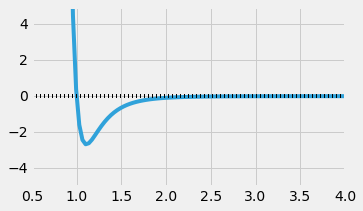

In [2]:
lj = lennard_jones([], [])

# Interaction matrix for particle types
P = [
    [lj, lj],
    [lj, lj]
    ]

plot_potentials(lj, fs=(5,3))

### Impermeable walls

Particles with `type=0` are static by design.

In [3]:
L = 100
H = 30
h = 0.1
coo = make_box(L, H, h)
nw = coo.shape[0]

typ    = zeros(nw, int32)
mass   = ones(nw)
radius = h * ones(nw)
scale  = ones(nw)

### Free particles

Initial locations are at the nodes of uniform grid with step $h = 1.$

In [4]:
h = 1
p = mgrid[h:L-h/2:h, h:H-h/2:h].reshape(2,-1).transpose()
np = p.shape[0]

coo    = append(coo,    p, axis=0).copy()
typ    = append(typ,    ones(np, int32)).copy()
mass   = append(mass,   10 * ones(np)).copy()
radius = append(radius, 0.5 * ones(np)).copy()
scale  = append(scale,  ones(np)).copy()

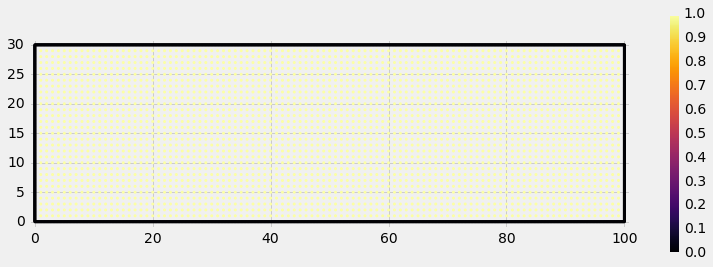

In [5]:
plot_points(coo, typ, fs=(12,4))

### Initial velocities

* Random velocities for free particles,
* Zero velocities for walls

In [6]:
vel = normal(0, 1, coo.shape)
vel[typ==0,:] = 0

acc = zeros_like(coo)

In [7]:
d = dem(P, coo, mass, radius, scale, typ, zeros((0,2)), device='Hawaii', gamma=0)
print(d.device())

Hawaii (AMD Accelerated Parallel Processing)


In [8]:
save = saver('snow', typ, mass, radius, scale)

time = 0
tau = 1e-5

100%|██████████| 100/100 [02:52<00:00,  1.32s/it]


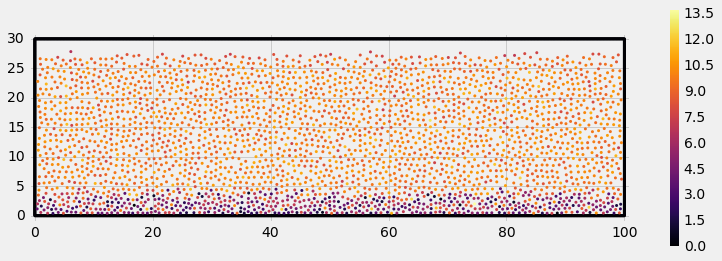

In [9]:
for i in tqdm(range(100), leave=True):
    time = d.advance(coo, vel, acc, 1000, tau, time)
    save(time, coo, vel, acc)

plot_points(coo, norm(vel, axis=1), fs=(12,4))